In [1]:
## Imports

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

sys.path.append("../.")

import handybeam_core
import handybeam_core.world
import handybeam_core.tx_array_library
import handybeam_core.tx_array
import handybeam_core.visualise
import handybeam_core.samplers.rectilinear_sampler
from handybeam_core.solver import Solver

matplotlib.rcParams['figure.figsize'] = [20, 10]


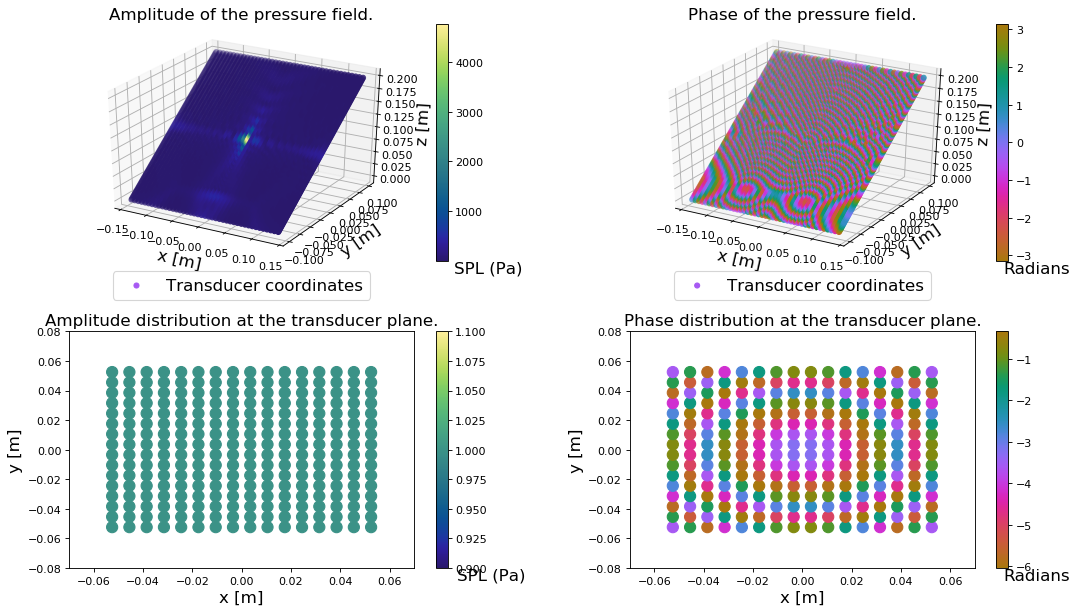

In [2]:
# Intialise the world.

world = handybeam_core.world.World(frequency = 40000, sound_velocity = 320)

# Add a transmitter array to the world.

world.tx_array = handybeam_core.tx_array_library.rectilinear(parent = world)

# Initialise solver object.

solver = handybeam_core.solver.Solver(parent = world)

# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.2

# Set grid extent around the origin.

grid_extent_around_origin_x = 0.1
grid_extent_around_origin_y = 0.1

# Set plane height 

focal_plane_height = 100e-3

# Specify the vector normal to the sampling grid 

norm_vector = np.array((0,1,-1))

# Specify a vector that is orthogonal to this vector ( this will be parallel to one axis of the sampling grid)

par_vector = np.array((0,1,1))

# Add a rectilinear sampling grid to the world.

rectilinear_sampler = world.add_sampler(handybeam_core.samplers.rectilinear_sampler.RectilinearSampler(parent = world,
                                                                               origin = np.array((0,0,focal_plane_height)),
                                                                               normal_vector = norm_vector,
                                                                               parallel_vector = par_vector,
                                                                               grid_spacing_per_wavelength = grid_spacing_per_wavelength,
                                                                               grid_extent_around_origin_x = grid_extent_around_origin_x,
                                                                               grid_extent_around_origin_y = grid_extent_around_origin_y))

# Instruct the solver to solve for the activation coefficients.

solver.single_focus_solver(x_focus = 0, y_focus = 0, z_focus = focal_plane_height) 

# Propagate the acoustic field

world.propagate()

# Visualise the result

rectilinear_sampler.visualise_all_in_one()
